In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import latex

In [16]:
def get_log(model, param='accu'):
    if model == "vgg":
        fname  = "vgg_train.log"
    elif model == "densenet":
        fname = "train_dense.log"
    else:
        raise ValueError("Not a valid model name. Enter either 'densenet' or 'vgg'")
    accuracy = []
    keep_phrases = [param]

    with open(fname) as f:
        f = f.readlines()

    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                el = re.findall(r'\d+', line)[-2:]
                el = ".".join(el)
                accuracy.append(el)
                break
    push_acc = accuracy[22]
    accuracy.pop(22)
    accuracy_test = np.array(accuracy[1::2],dtype='float')
    accuracy_train = np.array(accuracy[::2], dtype='float')
    return accuracy_train, accuracy_test


## Accuracy

Text(0.5, 0, 'Iteration')

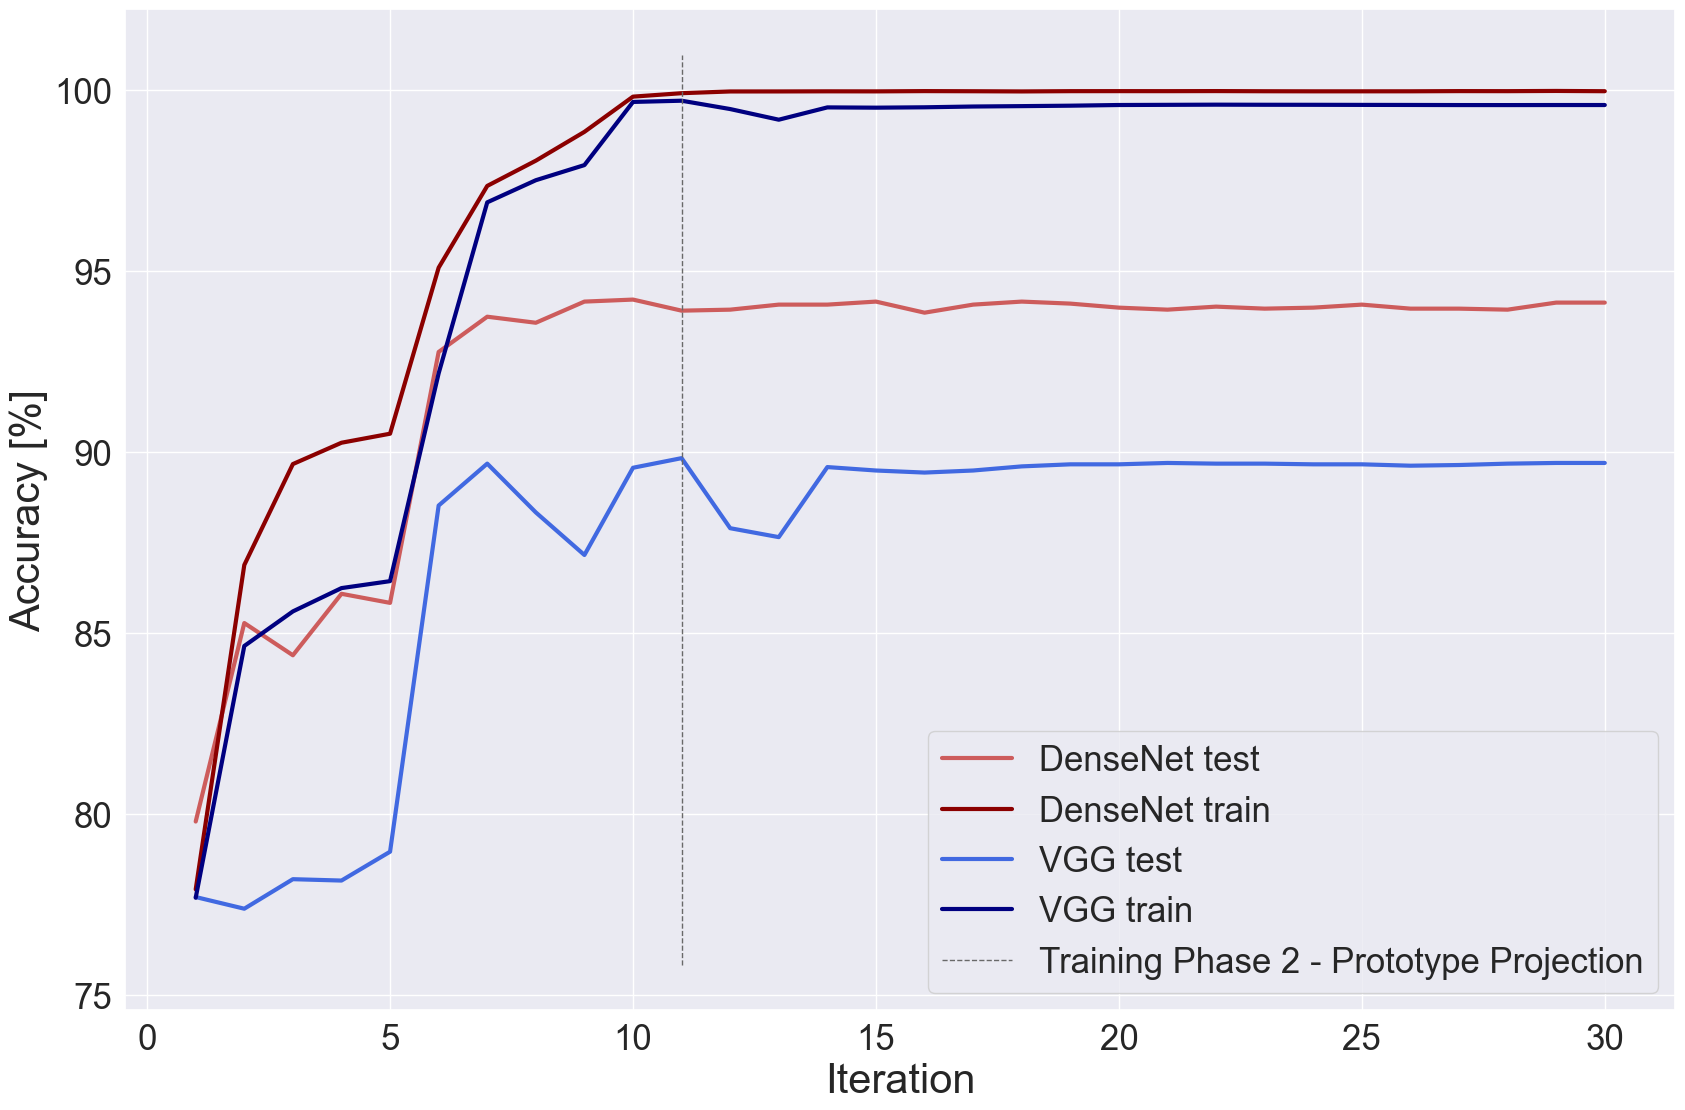

In [17]:
param = "accu"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)

train_dense, test_dense = train_dense[:30], test_dense[:30]
train_vgg = train_vgg[:30]

mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.98
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.01
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(20,13))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test', linewidth=3)
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train', linewidth=3)

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test', linewidth=3)
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train', linewidth=3)

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'dimgrey',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
plt.legend(fontsize=25)
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel("Accuracy [%]",fontdict={'fontsize':30})
ax.set_xlabel("Iteration",fontdict={'fontsize':30})
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })


## Avg Separation

Text(0.5, 0, 'Iteration')

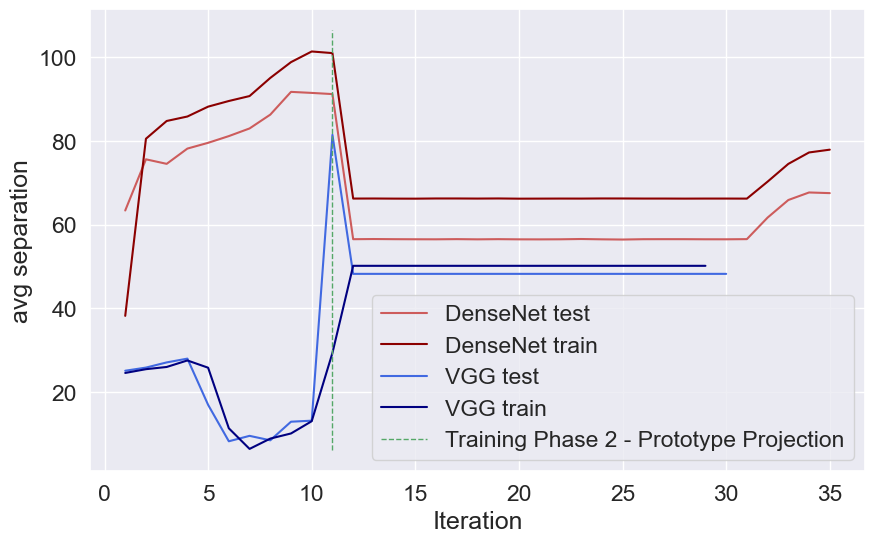

In [15]:
param = "avg separation"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)


mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.95
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.05
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test')
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train')

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test')
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train')

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'g',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")

plt.legend()
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel(param)
ax.set_xlabel("Iteration")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })


## cluster

Text(0.5, 0, 'Iteration')

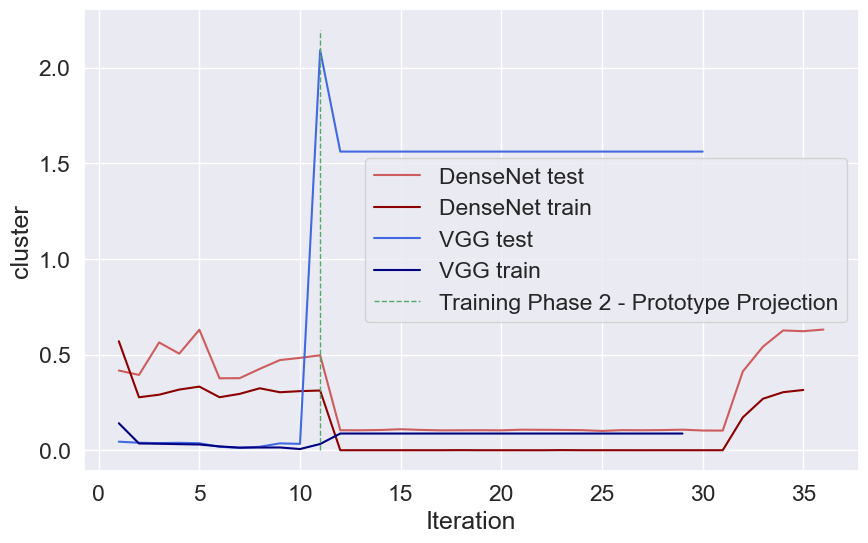

In [5]:
param = "cluster"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)


mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.95
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.05
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test')
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train')

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test')
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train')

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'g',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")

plt.legend()
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel(param)
ax.set_xlabel("Iteration")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

## Cross Entropy

Text(0.5, 0, 'Iteration')

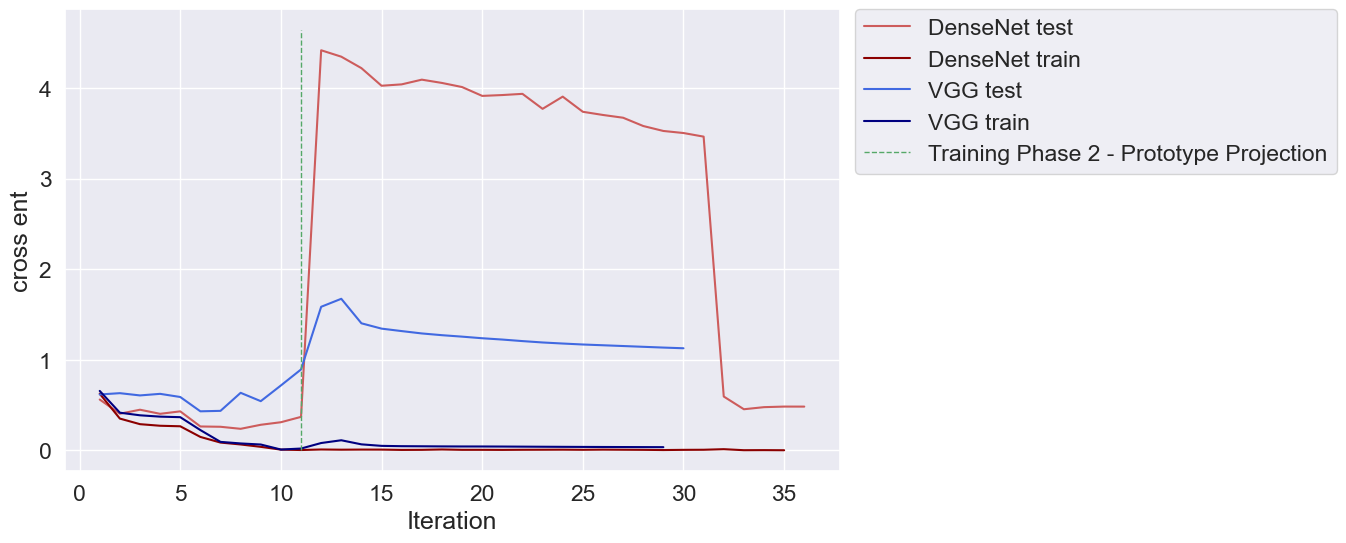

In [11]:
param = "cross ent"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)


mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.95
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.05
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test')
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train')

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test')
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train')

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'g',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")

plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0.)
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel(param)
ax.set_xlabel("Iteration")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

## l1

Text(0.5, 0, 'Iteration')

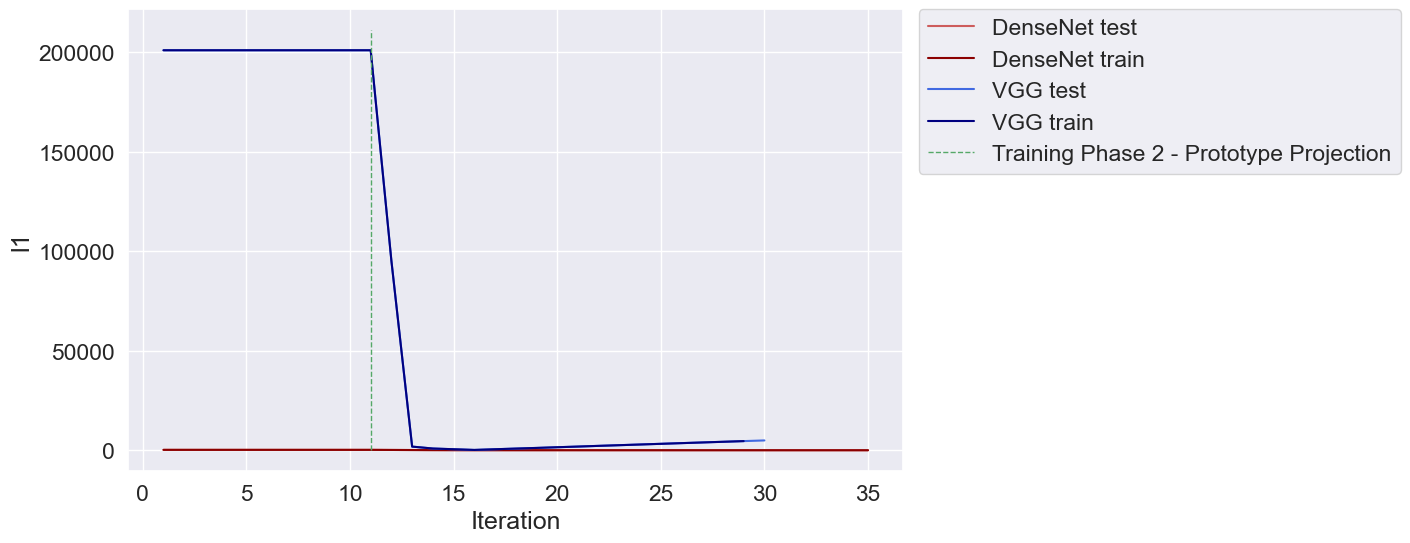

In [16]:
param = "l1"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)


mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.95
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.05
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test')
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train')

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test')
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train')

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'g',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")

plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0.)
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel(param)
ax.set_xlabel("Iteration")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

## p dist pair

Text(0.5, 0, 'Iteration')

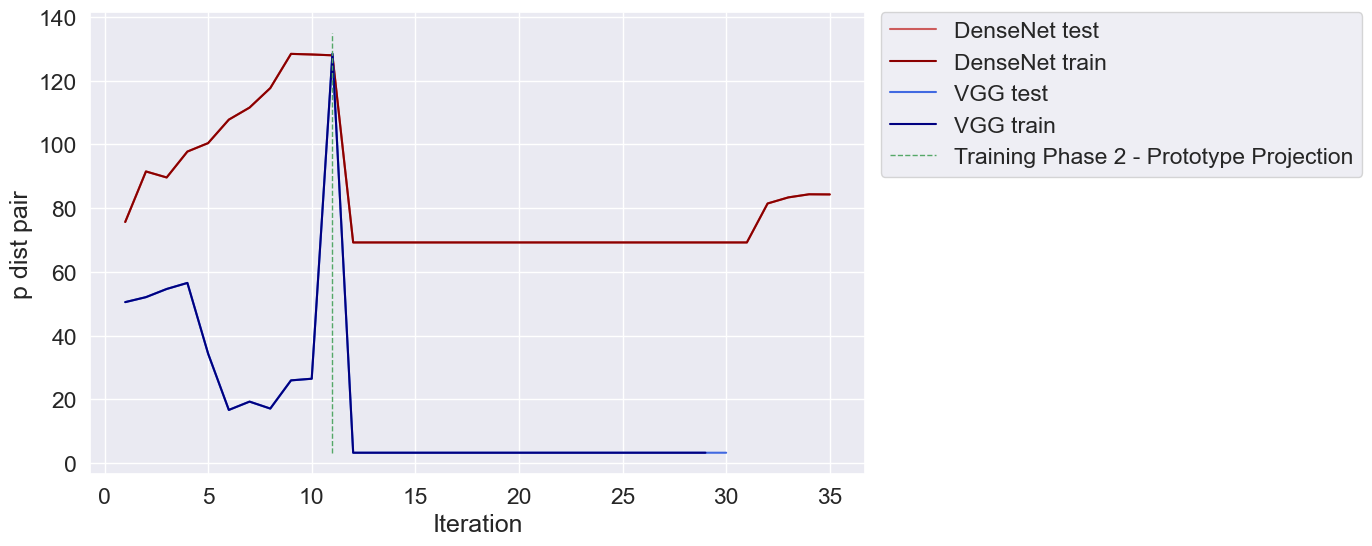

In [17]:
param = "p dist pair"
train_dense, test_dense = get_log("densenet",param)
train_vgg, test_vgg = get_log("vgg", param)


mini = np.min(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*0.95
maxi = np.max(np.hstack((train_dense.flatten(), test_dense.flatten(),train_vgg.flatten(), test_vgg.flatten())))*1.05
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(1,len(test_dense)+1),test_dense, c="indianred",label='DenseNet test')
ax.plot(np.arange(1,len(train_dense)+1),train_dense,c="darkred", label='DenseNet train')

ax.plot(np.arange(1,len(test_vgg)+1),test_vgg,"royalblue", label='VGG test')
ax.plot(np.arange(1,len(train_vgg)+1),train_vgg,"navy", label='VGG train')

plt.vlines(x = 11, ymin = mini, ymax = maxi,
           colors = 'g',
           label = 'Training Phase 2 - Prototype Projection',
           linewidth=1,
           linestyles="--")

plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left', borderaxespad=0.)
# ax.set_ylim((int(np.min(test_vgg,train_vgg,test_dense,train_dense)*(0.98)),int(np.max(test_vgg,train_vgg,test_dense,train_dense)*1.02)))
# ax.set_yticks([80,90,100])
# ax.set_yticklabels([80,90,100])
ax.set_ylabel(param)
ax.set_xlabel("Iteration")
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

<AxesSubplot: >

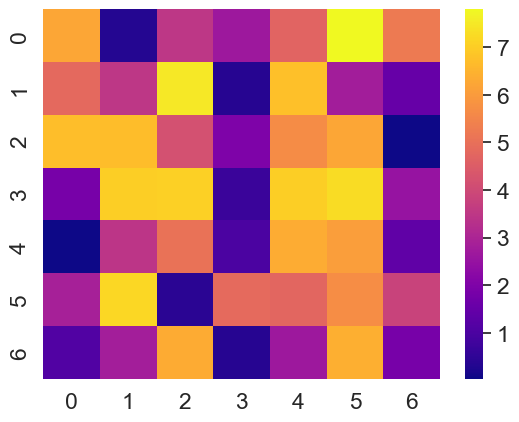

In [32]:
a = np.random.rand(7,7)*8
sns.heatmap(a,cmap="plasma")